For each efficacy question, compare the frequency of question + answer in training text. 

Training text means:
* musique-page
* musique-entigraph

In [1]:
from knowledge_propagation.utils import io, vars

In [5]:
id2musique_page = io.load_json("/u/zliu/datastor1/Synthetic_Continued_Pretraining/data/dataset/raw/id2musique_page.json")

In [4]:
musique_ids = [
    '2hop__60060_25017',
 '2hop__258019_119986',
 '2hop__13778_15345',
 '2hop__661591_13728',
 '2hop__341498_76347',
 '2hop__710977_25111',
 '2hop__72949_9902',
 '2hop__390772_565667',
 '2hop__132710_120035',
 '2hop__508013_351187']

In [19]:
from nltk import ngrams

In [181]:
from collections import defaultdict
import numpy as np
from nltk.corpus import stopwords

# import nltk
# nltk.download('stopwords')
stop_words = stopwords.words('english')



In [180]:
def get_record(musique_id, n, absolute):
    assert musique_id in id2musique_page

    musique_page_text = io.load_json(f"/u/zliu/datastor1/Synthetic_Continued_Pretraining/data/dataset/raw/musique_page/{musique_id}.json")["article"]
    musique_entigraph_text = "\n\n".join(io.load_json(f"/u/zliu/datastor1/Synthetic_Continued_Pretraining/data/dataset/raw/musique_entigraph_gpt-4-turbo_sample8/{musique_id} by author.json")[1:])


    efficacy_questions = id2musique_page[musique_id]["single_hop_efficacy"]


    musique_page_ngram_counter = defaultdict(int)
    musique_entigraph_ngram_counter = defaultdict(int)

    # n = 1
    # absolute = False

    musique_page_ngrams = list(ngrams(musique_page_text.lower().split(), n))
    musique_entigraph_ngrams = list(ngrams(musique_entigraph_text.lower().split(), n))

    for ngram in musique_page_ngrams:
        musique_page_ngram_counter[ngram] += 1
        
    for ngram in musique_entigraph_ngrams:
        musique_entigraph_ngram_counter[ngram] += 1
        
    if not absolute:
        musique_page_ngram_sum = sum(musique_page_ngram_counter.values())
        
        for ngram in musique_page_ngram_counter.keys():
            musique_page_ngram_counter[ngram] = musique_page_ngram_counter[ngram] / musique_page_ngram_sum
        
        musique_entigraph_ngram_sum = sum(musique_entigraph_ngram_counter.values())
        
        for ngram in musique_entigraph_ngram_counter.keys():
            musique_entigraph_ngram_counter[ngram] = musique_entigraph_ngram_counter[ngram] / musique_entigraph_ngram_sum

    all_n_gram_in_question = set()
    for q in efficacy_questions:
        all_n_gram_in_question = all_n_gram_in_question.union(set(ngrams(q["question"].lower().split(), n)))

    # print("Absolute frequency:" if absolute else "Relative frequency")
    # print(f"n = {n}")
    
    count_of_page_higher = 0
    count_of_entigraph_higher = 0
    count_of_legal_token = 0
    for ngram in all_n_gram_in_question:
        if n == 1 and ngram[0] in stop_words:
            continue
        
        count_of_legal_token += 1
        count_of_entigraph_higher += musique_entigraph_ngram_counter[ngram] > musique_page_ngram_counter[ngram]
        count_of_page_higher += musique_page_ngram_counter[ngram] > musique_entigraph_ngram_counter[ngram]
    return {
        "musique_id": musique_id,
        "n": n,
        "frequency in training text": "Absolute" if absolute else "Relative",
        "count_of_entigraph_higher": count_of_entigraph_higher,
        "count_of_page_higher": count_of_page_higher,
        "count_of_legal_token": count_of_legal_token,
        "count_of_entigraph_higher%": count_of_entigraph_higher / count_of_legal_token,
        "count_of_page_higher%": count_of_page_higher / count_of_legal_token,
    }

In [182]:
musique_id = musique_ids[5]
all_records = []
for musique_id in musique_ids:
    for n in [1, 2, 3, 4]:
        for absolute in [True, False]:
            all_records.append(get_record(musique_id, n=n, absolute=absolute))
import pandas as pd
df = pd.DataFrame(all_records)

([<matplotlib.axis.XTick at 0x7f1a608a11d0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

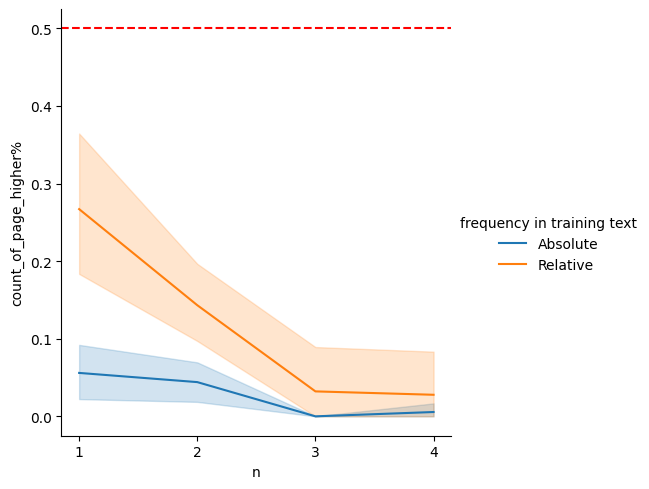

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.relplot(data=df, x="n", y="count_of_entigraph_higher%", hue="frequency in training text", kind="line",)
sns.relplot(data=df, x="n", y="count_of_page_higher%", hue="frequency in training text", kind="line",)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks([1,2,3,4], ["1", "2", "3", "4"])

In [104]:
musique_page_ngram_counter[ngram]

0

For each efficacy question, compare the frequency of question + answer in training text. 

Training text means:
* musique-page
* musique-entigraph

In [ ]:
from knowledge_propagation.utils import io, vars

In [ ]:
id2musique_page = io.load_json("/u/zliu/datastor1/Synthetic_Continued_Pretraining/data/dataset/raw/id2musique_page.json")

In [ ]:
musique_ids = [
    '2hop__60060_25017',
 '2hop__258019_119986',
 '2hop__13778_15345',
 '2hop__661591_13728',
 '2hop__341498_76347',
 '2hop__710977_25111',
 '2hop__72949_9902',
 '2hop__390772_565667',
 '2hop__132710_120035',
 '2hop__508013_351187']

In [ ]:
efficacy_questions[0]["question"] 

'who does the lamb represent in the bible'

'The title \'Lamb of God\' refers to Jesus and is prominently used in the Gospel of John where it signifies Jesus\' role in taking away the world\'s sins. This title is highlighted when John the Baptist acknowledges Jesus with this epithet. Additionally, the article discusses how the death of Jesus is intricately detailed in the four canonical gospels, which include narratives of his prediction of death, arrest, trial, crucifixion, burial, and resurrection. These events are given a thorough exposition, with the gospels providing close to an hour-by-hour description of the occurrences.\n\n### Questions and answers about resurrection in context of the identified article\n\nQuestion: How does the concept of resurrection serve as a climactic point in the narrative structure of the Gospels according to the article?\nAnswer: The resurrection serves as a narrative climax in the Gospels as indicated by the detailed emphasis and extensive coverage it receives compared to other events in Jesus\'

In [ ]:
from nltk import ngrams

In [ ]:
from collections import defaultdict
import numpy as np
from nltk.corpus import stopwords

# import nltk
# nltk.download('stopwords')
stop_words = stopwords.words('english')

musique_id = musique_ids[5]
all_records = []
for musique_id in musique_ids:
    for n in [1, 2, 3, 4]:
        for absolute in [True, False]:
            all_records.append(get_record(musique_id, n=n, absolute=absolute))

UnboundLocalError: cannot access local variable 'count_of_page_higher' where it is not associated with a value

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.relplot(data=df, x="n", y="count_of_entigraph_higher%", hue="frequency in training text", kind="line",)

plt.axhline(y=0.5, color='r', linestyle='--')
plt.xticks([1,2,3,4], ["1", "2", "3", "4"])

([<matplotlib.axis.XTick at 0x7f1a61c0ee50>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

In [ ]:
sum(musique_page_ngram_counter.values())

0.19601069412086058

In [ ]:
list(musique_page_ngrams)

[]

In [ ]:
musique_page_ngram_counter[ngram]

0

Relative frequency
('represent',):
Page: 0.00011495574203931487
Entigraph: 3.465423734687159e-05

('does',):
Page: 0.0003448672261179446
Entigraph: 0.0015421135619357858

('bible',):
Page: 0.00011495574203931487
Entigraph: 0

('the',):
Page: 0.09495344292447408
Entigraph: 0.09886853915062464

('lamb',):
Page: 0.005977698586044373
Entigraph: 0.0032055169545856218

('in',):
Page: 0.025635130474767214
Entigraph: 0.030478401746573562

('who',):
Page: 0.003333716519140131
Entigraph: 0.001940637291424809



Relative frequency
('represent',):
Page: 0.00011495574203931487
Entigraph: 3.465423734687159e-05

('does',):
Page: 0.0003448672261179446
Entigraph: 0.0015421135619357858

('bible',):
Page: 0.00011495574203931487
Entigraph: 0

('the',):
Page: 0.09495344292447408
Entigraph: 0.09886853915062464

('lamb',):
Page: 0.005977698586044373
Entigraph: 0.0032055169545856218

('in',):
Page: 0.025635130474767214
Entigraph: 0.030478401746573562

('who',):
Page: 0.003333716519140131
Entigraph: 0.001940637291424809

